In [1]:
import astropy
from astropy.wcs import WCS
from astropy import wcs
from astropy.io import fits
from astropy.coordinates import Angle
from astropy.utils.data import get_pkg_data_filename
from astropy.coordinates import SkyCoord
import astropy.units as un
from astropy.nddata import Cutout2D
import aplpy

import numpy as np

from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator

import warnings
warnings.filterwarnings("ignore")

In [2]:
def center(hdu):
    centpxl_ra, centpxl_dec = hdu.header['CRPIX1'], hdu.header['CRPIX2']
    center_ra, center_dec = hdu.header['CRVAL1'], hdu.header['CRVAL2']
    npxl_ra, npxl_dec = hdu.header['CDELT1'], hdu.header['CDELT2']
    
    
    return centpxl_ra, centpxl_dec, center_ra, center_dec, npxl_ra, npxl_dec


def beam(hdu):
    b_major, b_minor, b_pa = hdu.header['BMAJ'], hdu.header['BMIN'], hdu.header['BPA']
    
    return b_major, b_minor, b_pa


def info(hdu):
    obs_code, obs_date = hdu.header['OBSERVER'], hdu.header['DATE-OBS']
    obsra, obsdec = hdu.header['OBSRA'], hdu.header['OBSDEC']
    rms, max, min = hdu.header['NOISE'], hdu.header['DATAMIN'], hdu.header['DATAMAX']
    
    return obs_code, obsra, obsdec, rms, min, max

def load(filename):
    #file = get_pkg_data_filename(filename)
    image, aips = fits.open(filename)
    image_array = image.data
    image_data = image_array[0][0]
    wcs= WCS(image.header)
    
    return(image_data, wcs, image)


NameError: name 'rms' is not defined

In [5]:
img_datad, wcsd, imaged = load('V1674HERD_3.fits')
obsd, obsrad, obsdecd, rmsd, maxd, mind = info(imaged)
b_majord, b_minobd, b_pad = beam(imaged)

centpxl_rad, centpxl_decd, center_rad, center_decd, npxl_rad, npxl_decd = center(imaged)
minb = -5.0190057663713e-05
maxb =  9.5325049187522e-05
print(mind, maxd)
wcsd[0,0]
rmsd

-5.3138803195907e-05 9.4973853265401e-05


8.7410053311032e-06

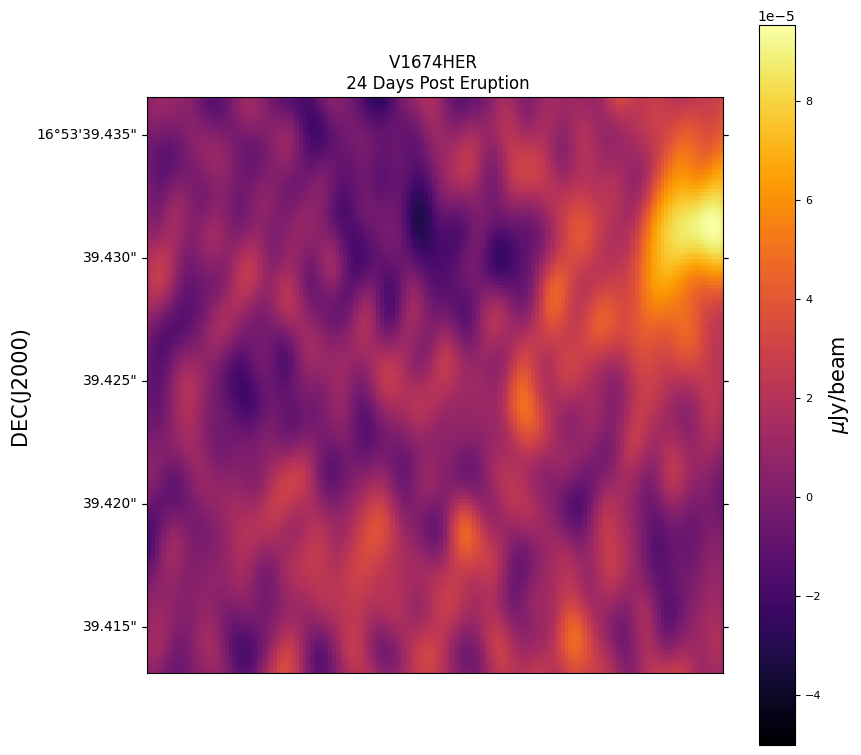

In [6]:
figd = plt.figure(figsize=(9,9))
axd = figd.add_axes([0.1, 0.1, 0.8, 0.8], projection=wcsd,slices=('x','y',0,0))

cut_datad = img_datad[384:540, 384:540] #y then x
rad = axd.coords[0]
decd = axd.coords[1]
rad.set_axislabel("RA(J2000)", minpad=0.8, fontsize=15)
decd.set_axislabel("DEC(J2000)", minpad=0.8, fontsize=15)
rad.set_major_formatter('hh:mm:ss.ss')
axd.set_title(f'V1674HER \n 24 Days Post Eruption')
#rad.set_ticks(number=4)


# rad.display_minor_ticks(True)
# decd.display_minor_ticks(True)


imd = axd.imshow(cut_datad, cmap='inferno', vmin=minb, vmax=maxb, transform=axd.get_transform(wcsd[0,0]), origin='lower')

cbard = figd.colorbar(imd, location='right')
#fmt = matplotlib.ticker.FuncFormatter(func)

cbard.ax.set_ylabel(r'$\mu$Jy/beam', fontsize=15)
for t in cbard.ax.get_yticklabels():
    t.set_fontsize(8)
